In [2]:
import numpy as np
from matplotlib import pyplot as plt
from utils import * 

In [31]:
L=2049  # system size 2**n+1
N=600 # number of realisations

p=0.34 # prob. of hopping in the same direction as the previous hop 
q=0.33

hs = np.arange(0.305, 0.310, 0.001) 
n = int(np.floor(np.log2(L)) - 1)

edge_reach_frac = [] 
ts = [] 
mean_msds = [] 
actives = [] 
passives = [] 

for h in hs:
    filename = 'data_L{}_N{}_p{}_q{}_h{:.3f}.dat'.format(L, N, p, q, h)
    print(filename)
    file = open(filename)
    realisations, moments = read_file(file, verbose=False) 
    
    times = [] 
    msds = [] 
    tot_edge_reach = 0 
    tot_possible_edge = len(realisations)*4 

    for (i, realisation) in enumerate(realisations):

        time, msd, edge_reach, coarse_grain_moments = extract_lite(realisation, n)
        times.append(time)
        msds.append(msd)
        tot_edge_reach += np.sum(edge_reach>0)
        
    edge_reach_frac.append(tot_edge_reach/tot_possible_edge)
    t = select_longest(times)
    mean_msd = np.mean(pad(msds), axis=0)
    
    ts.append(t) 
    mean_msds.append(mean_msd)
    
    active_moments, tracer_moments = extract_moments(moments)
    
    actives.append(active_moments)
    passives.append(tracer_moments)

data_L2049_N600_p0.34_q0.33_h0.305.dat
data_L2049_N600_p0.34_q0.33_h0.306.dat
data_L2049_N600_p0.34_q0.33_h0.307.dat
data_L2049_N600_p0.34_q0.33_h0.308.dat
data_L2049_N600_p0.34_q0.33_h0.309.dat
data_L2049_N600_p0.34_q0.33_h0.310.dat


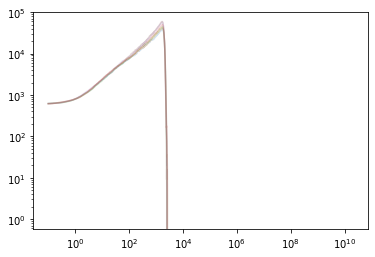

In [32]:
for (i, active_moments) in enumerate(actives): 
    t = active_moments[:, 0]
    t = np.append(t, ts[i][-1])
    m = active_moments[:, 2]
    m = np.append(m, 0)

    plt.plot(t, m, alpha=0.2)
plt.yscale('log')
plt.xscale('log')
plt.show() 

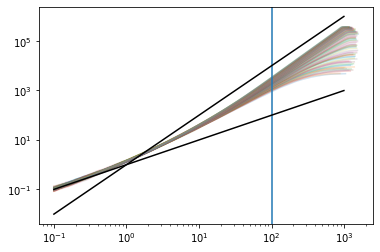

In [26]:
for (t, m) in zip(ts, mean_msds): 
    if len(t[:-1]) == len(m):
        plt.plot(t[:-1], m, alpha=0.2)
plt.axvline(x=1e2)

x = np.array(t)
x = x[x<1e3] 
plt.plot(x, x**2, color='k')
plt.plot(x, x, color='k')
plt.xscale('log')
plt.yscale('log')
plt.show() 

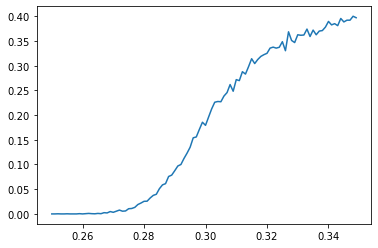

In [27]:
plt.plot(hs, edge_reach_frac)
plt.show() 